In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-traindataset/ML_Train_Data.csv
/kaggle/input/ml-traindataset/ML_Train_Data_V2.csv


**Loading the data**

In [10]:
import pandas as pd

In [22]:
Ml_Train=pd.read_csv('/kaggle/input/ml-traindataset/ML_Train_Data.csv')
Ml_Train.head()

DetectorId  AlertTitle           Category        MitreTechniques  \
0           7           6      InitialAccess        T1078;T1078.004   
1          58          43       Exfiltration                  T1041   
2         423         298      InitialAccess                  T1189   
3           2           2  CommandAndControl      T1046;T1071;T1210   
4           9          74          Execution  T1559;T1106;T1059.005   

  EntityType EvidenceRole  Day      PartOfDay   IncidentGrade  
0         Ip      Related    4        Morning    TruePositive  
1       User     Impacted   14  Early Morning   FalsePositive  
2        Url      Related   13  Early Morning   FalsePositive  
3        Url      Related   10        Evening  BenignPositive  
4       User     Impacted   15  Early Morning    TruePositive

In [23]:
Ml_Test=pd.read_csv('/kaggle/input/updated-test/Ml_Test_updated.csv')
Ml_Test.head()

DetectorId  AlertTitle           Category              MitreTechniques  \
0         524         563    LateralMovement  T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl  T1046;T1030;T1071;T1071.001   
2           0           0      InitialAccess              T1078;T1078.004   
3          27          18          Discovery              T1087;T1087.002   
4           0           0      InitialAccess              T1078;T1078.004   

          EntityType EvidenceRole  Day  PartOfDay   IncidentGrade  
0               User     Impacted    4      Night  BenignPositive  
1            Machine     Impacted    3  Afternoon  BenignPositive  
2  CloudLogonSession      Related   12  Afternoon   FalsePositive  
3               User     Impacted    6    Evening  BenignPositive  
4               User     Impacted    6    Morning    TruePositive

**Encoding the Required column**

In [24]:
# Import label encoder 
from sklearn import preprocessing 
a=['Category','MitreTechniques','EntityType','EvidenceRole','PartOfDay','IncidentGrade']
label_encoder = preprocessing.LabelEncoder() 
for i in a:
    Ml_Train[i]= label_encoder.fit_transform(Ml_Train[i]) 
    print(Ml_Train[i].unique())
    Ml_Test[i]= label_encoder.transform(Ml_Test[i]) 
    print(Ml_Test[i].unique())

[10  7  1  6 16  9  0  2 13  5 12  4  8 14 11 15 17  3 19 18]
[11  1 10  5 16  9  2  7 17  4 12  6 13  3  0 15  8 14 19]
[ 682  463  838 ... 1132   10 1082]
[ 375  470  682  722 1138  937  783  463 1076  206  866 1056 1099  777
  399 1079  564  654  812   92 1050 1077  771  659  471  683  668  583
  776  441  393  612  775  410  719  664  767  591  138  563  158  201
   80  608  752  952  925  485  617  284  413  817  843  876  957 1089
  845  886  920  468  553  196  944  713  712  531  624  348  931  518
 1106  979   70  963  649  709  936  469  911  202 1017   50  181   12
 1096 1054  863 1100  838 1078  557  505   39   87  846  686  560  926
  329  950  748  631 1128  839 1139  724   58  548  736 1015  124 1104
  971 1102  295 1041  532  864  346  688  960  610  674  956  977  315
  982  985  448  804 1105  562  480  924  559  458  740 1071  420 1038
  213  109 1037  976 1073  243  459 1025  431  707  140  813  901  405
  663  650  734  581   47  303  603  195  293  893 1140  508  

In [27]:
Ml_Test.to_csv('Ml_Test_Encoded.csv', index=False)

In [6]:
import pickle

# Save the model to a file using Pickle
with open('Encode.pkl', 'wb') as file:
   pickle.dump(label_encoder, file)

In [25]:
Ml_Train.head()

DetectorId  AlertTitle  Category  MitreTechniques  EntityType  \
0           7           6        10              682          15   
1          58          43         7              463          32   
2         423         298        10              838          31   
3           2           2         1              471          31   
4           9          74         6             1050          32   

   EvidenceRole  Day  PartOfDay  IncidentGrade  
0             1    4          3              2  
1             0   14          1              1  
2             1   13          1              1  
3             1   10          2              0  
4             0   15          1              2

In [26]:
Ml_Test.head()

DetectorId  AlertTitle  Category  MitreTechniques  EntityType  \
0         524         563        11              375          32   
1           2           2         1              470          19   
2           0           0        10              682           7   
3          27          18         5              722          32   
4           0           0        10              682          32   

   EvidenceRole  Day  PartOfDay  IncidentGrade  
0             0    4          4              0  
1             0    3          0              0  
2             1   12          0              1  
3             0    6          2              0  
4             0    6          3              2

**Seggregate the Features and Targets**

In [36]:
Features=Ml_Train.drop('IncidentGrade',axis=1)
Features.head()

DetectorId  AlertTitle  Category  MitreTechniques  EntityType  \
0           7           6        10              682          15   
1          58          43         7              463          32   
2         423         298        10              838          31   
3           2           2         1              471          31   
4           9          74         6             1050          32   

   EvidenceRole  Day  PartOfDay  
0             1    4          3  
1             0   14          1  
2             1   13          1  
3             1   10          2  
4             0   15          1

In [37]:
Target=Ml_Train['IncidentGrade']
Target

0          2
1          1
2          1
3          0
4          2
          ..
9465492    2
9465493    0
9465494    0
9465495    0
9465496    0
Name: IncidentGrade, Length: 9465497, dtype: int64

**Spliting the Dataset for test and train**

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Features,Target, test_size=0.3,random_state=42,stratify=Target)

**Scaling the Features**

In [46]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
import pickle

# Save the model to a file using Pickle
with open('Scale1.pkl', 'wb') as file:
   pickle.dump(scaler, file)

**Lets check if there is any imbalance in the Classes**

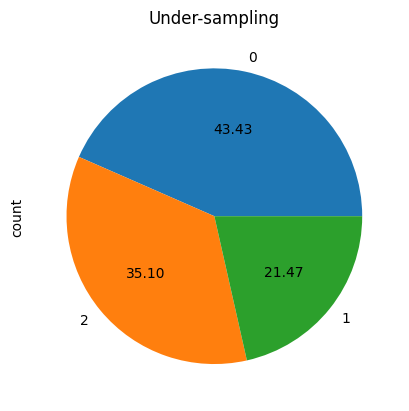

In [47]:
y_train.value_counts()

ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

> ***There is a slight imbalance between the classification since there is enough data i am going with the Under sampleing technique***

In [41]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 6.9 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


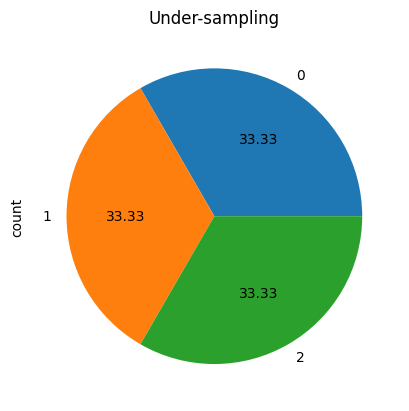

In [48]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler() # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)


ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

**Now Lets train the model**

In [43]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [49]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
#from xgboost import XGBClassifier

# Initialize the models
#model_lr = LogisticRegression(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)


# Fit each model
#model_lr.fit(X_train_rus, y_train_rus)
model_dt.fit(X_train_rus, y_train_rus)
model_rf.fit(X_train_rus, y_train_rus)



RandomForestClassifier(random_state=42)

In [45]:
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=8)
model_sgd = SGDClassifier(random_state=42)
model_xgb = XGBClassifier(random_state=42)

model_gb.fit(X_train_rus, y_train_rus)
model_knn.fit(X_train_rus, y_train_rus)
model_sgd.fit(X_train_rus, y_train_rus)
model_xgb.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [48]:
# Import required metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of models and their names
models = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Gradient Boosting": model_gb,
    "K-Nearest Neighbors": model_knn,
    "SGD Classifier": model_sgd,
    "XGBoost": model_xgb
}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Evaluating {name}:")
    
    # Predict on the test set 
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy Score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n" + "="*60 + "\n")


Evaluating Logistic Regression:
Accuracy: 0.4608
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46   1233246
           1       0.27      0.28      0.28    609590
           2       0.50      0.63      0.56    996814

    accuracy                           0.46   2839650
   macro avg       0.44      0.44      0.43   2839650
weighted avg       0.46      0.46      0.46   2839650

Confusion Matrix:
[[510283 332033 390930]
 [204319 172160 233111]
 [248264 122355 626195]]


Evaluating Decision Tree:
Accuracy: 0.8285
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86   1233246
           1       0.77      0.77      0.77    609590
           2       0.85      0.79      0.82    996814

    accuracy                           0.83   2839650
   macro avg       0.82      0.82      0.82   2839650
weighted avg       0.83      0.83      0.83   2839650

Confusi

In [50]:
# Import required metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of models and their names
models = {
    #"Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    #"Gradient Boosting": model_gb,
    #"K-Nearest Neighbors": model_knn,
    #"SGD Classifier": model_sgd,
    #"XGBoost": model_xgb
}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Evaluating {name}:")
    
    # Predict on the test set 
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy Score
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\n" + "="*60 + "\n")


Evaluating Decision Tree:
Accuracy: 0.8283
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86   1233246
           1       0.77      0.77      0.77    609590
           2       0.85      0.79      0.82    996814

    accuracy                           0.83   2839650
   macro avg       0.82      0.82      0.82   2839650
weighted avg       0.83      0.83      0.83   2839650

Confusion Matrix:
[[1097596   70390   65260]
 [  69389  468378   71823]
 [ 140676   70152  785986]]


Evaluating Random Forest:
Accuracy: 0.8219
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86   1233246
           1       0.76      0.76      0.76    609590
           2       0.85      0.79      0.81    996814

    accuracy                           0.82   2839650
   macro avg       0.81      0.81      0.81   2839650
weighted avg       0.82      0.82      0.82   2839650

Conf

In [49]:
# Import required metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of models and their names
models = {
    "Logistic Regression": model_lr,
    "Decision Tree": model_dt,
    "Random Forest": model_rf,
    "Gradient Boosting": model_gb,
    "K-Nearest Neighbors": model_knn,
    "SGD Classifier": model_sgd,
    "XGBoost": model_xgb
}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Validating {name}:")
    
    # Predict on the train set 
    y_pred_val = model.predict(X_train_rus)
    
    # Accuracy Score
    acc = accuracy_score(y_train_rus,y_pred_val)
    print(f"Accuracy: {acc:.4f}")
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_train_rus,y_pred_val))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_train_rus,y_pred_val))
    
    print("\n" + "="*60 + "\n")


Evaluating Logistic Regression:
Accuracy: 0.4421
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.41      0.41   1422377
           1       0.42      0.28      0.34   1422377
           2       0.47      0.63      0.54   1422377

    accuracy                           0.44   4267131
   macro avg       0.44      0.44      0.43   4267131
weighted avg       0.44      0.44      0.43   4267131

Confusion Matrix:
[[588776 382292 451309]
 [475256 402688 544433]
 [352689 174656 895032]]


Evaluating Decision Tree:
Accuracy: 0.8222
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84   1422377
           1       0.87      0.77      0.82   1422377
           2       0.83      0.79      0.81   1422377

    accuracy                           0.82   4267131
   macro avg       0.83      0.82      0.82   4267131
weighted avg       0.83      0.82      0.82   4267131

Confusi

**Lets compare the Evaluation and Validation scores**

In [56]:
Model=['Logistic_reggression','Decision_Tree','Random_Forest','Gradient_Boosting','K-nearest-Neigbour','Stochastic Gradient Descent (SGD)','Xtream_GB']
R2_Evalu=[46,82.85,82.23,73,59,52,79]
R2_validation=[44,82.22,82.22,71,56,45,77]

In [ ]:
print(Model)
print(R2_Evalu)
print(R2_validation)

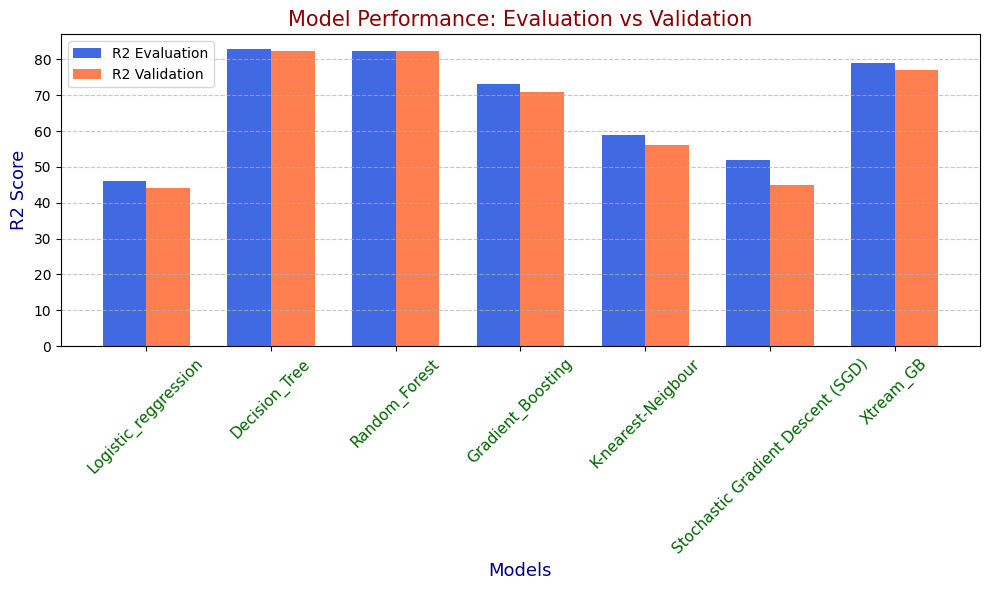

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plotting the grouped bar chart
bar_width = 0.35
index = np.arange(len(Model))

plt.bar(index, R2_Evalu, width=bar_width, color='royalblue', label='R2 Evaluation')
plt.bar(index + bar_width, R2_validation, width=bar_width, color='coral', label='R2 Validation')

# Labeling the chart
plt.xlabel('Models', fontsize=13, color='darkblue')
plt.ylabel('R2 Score', fontsize=13, color='darkblue')
plt.title('Model Performance: Evaluation vs Validation', fontsize=15, color='darkred')

# Adding model names
plt.xticks(index + bar_width / 2, Model, rotation=45, fontsize=11, color='darkgreen')

# Adding a legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [51]:
import pickle


# Save the model to a file using Pickle
with open('Random_forest_model.pkl', 'wb') as file:
   pickle.dump(model_rf, file)

In [52]:
import pickle


# Save the model to a file using Pickle
with open('DecisionTree_model.pkl', 'wb') as file:
   pickle.dump(model_dt, file)

> ***So the Top performing Model are Decision_Tree,Random_Forest and Xtream_GB***

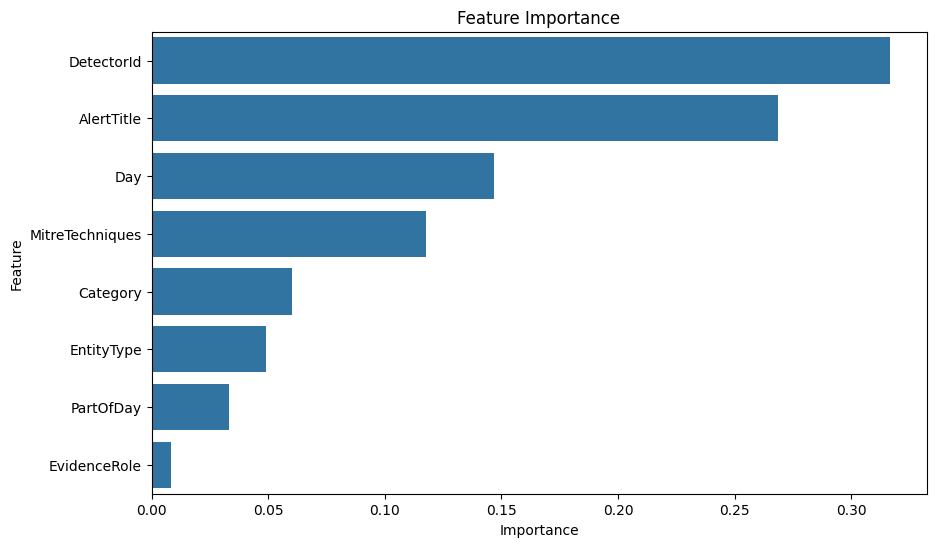

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


feature_importance = model_rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sorting the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Decision Tree Optimization**

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optimized parameter grid for the DecisionTreeClassifier
params = {
    'max_depth': [4, 6, 8, 10],           # Focused on fewer depths
    'min_samples_split': [2, 5, 10],      # Fewer values for min_samples_split
    'min_samples_leaf': [1, 2, 4],        # Fewer values for min_samples_leaf
    'criterion': ['gini', 'entropy'],     # Retain both criteria
}

# Initialize the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Set up the GridSearchCV with a smaller grid and fewer combinations
gcv = GridSearchCV(estimator=classifier, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Fit the grid search on the training data
gcv.fit(X_train_rus, y_train_rus)

# Output the best parameters and the best score
print("Best Parameters: ", gcv.best_params_)
print("Best Accuracy Score on Training Set: ", gcv.best_score_)

# Evaluate the best model on the test set
best_classifier = gcv.best_estimator_
y_pred_Op = best_classifier.predict(X_test_scaled)

# Calculate accuracy on test set
accuracy = accuracy_score(y_test, y_pred_Op)
print("Accuracy Score on Test Set: ", accuracy)

# Output the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_Op))

# Output the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_Op))

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score on Training Set:  0.6994156026133557
Accuracy Score on Test Set:  0.730815065236913
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78   1233246
           1       0.63      0.56      0.59    609590
           2       0.82      0.69      0.75    996814

    accuracy                           0.73   2839650
   macro avg       0.72      0.70      0.71   2839650
weighted avg       0.73      0.73      0.73   2839650

Confusion Matrix:
 [[1044651  112966   75629]
 [ 191531  340513   77546]
 [ 223836   82883  690095]]


**Random Forest Optimization**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Optimized parameter grid for the RandomForestClassifier
params = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at a leaf node  
         }

# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV with the parameter grid
gcv = GridSearchCV(estimator=classifier, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Fit the grid search on the training data
gcv.fit(X_train_rus, y_train_rus)

# Output the best parameters and the best score
print("Best Parameters: ", gcv.best_params_)
print("Best Accuracy Score on Training Set: ", gcv.best_score_)

# Evaluate the best model on the test set
best_classifier = gcv.best_estimator_
y_pred_Op = best_classifier.predict(X_test_scaled)

# Calculate accuracy on test set
accuracy = accuracy_score(y_test, y_pred_Op)
print("Accuracy Score on Test Set: ", accuracy)

# Output the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_Op))

# Output the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_Op))


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Convert numpy arrays to pandas DataFrames
X_train_df = pd.DataFrame(X_train_rus)
y_train_df = pd.Series(y_train_rus)

# Define the parameter grid for RandomizedSearchCV
params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=params,
    n_iter=50,  # Number of different combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1,  # Print progress
    random_state=42,
)

# Sample a subset of the data (e.g., 20% of the data)
X_train_subset = X_train_df.sample(frac=0.2, random_state=42)  # Use 20% of the data
y_train_subset = y_train_df[X_train_subset.index]

# Fit the RandomizedSearchCV on the subset of data
random_search.fit(X_train_subset, y_train_subset)

# Output the best parameters and the best score
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy Score on Training Set: ", random_search.best_score_)

# Evaluate the best model on the test set
best_classifier = random_search.best_estimator_
y_pred_Op = best_classifier.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred_Op)
print("Accuracy Score on Test Set: ", accuracy)

# Output the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_Op))

# Output the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_Op))


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [21]:
import numpy as np

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)


def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = - np.log(y_pred[range(n_samples), y_true])
    loss = np.sum(logp) / n_samples
    return loss


def softmax_derivative(output, y_true):
    output[range(y_true.shape[0]), y_true] -= 1
    return output / y_true.shape[0]


class MulticlassPerceptron:
    def __init__(self, input_dim, output_dim):
        self.weights = np.random.randn(input_dim, output_dim)
        self.bias = np.random.randn(output_dim)


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return softmax(linear_output)


    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            linear_output = np.dot(X, self.weights) + self.bias
            predictions = softmax(linear_output)
            
            # Compute the error using cross-entropy loss
            loss = cross_entropy_loss(y, predictions)
            
            # Backward pass (gradient calculation)
            error = softmax_derivative(predictions, y)
            
            # Update the weights and bias
            self.weights -= learning_rate * np.dot(X.T, error)
            self.bias -= learning_rate * np.sum(error, axis=0)
            
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")


# Initialize the perceptron
input_dim = X_train_rus.shape[1]   # Number of features in X_train_rus
output_dim = len(np.unique(y_train_rus))  # Number of classes in y_train_rus
perceptron = MulticlassPerceptron(input_dim=input_dim, output_dim=output_dim)

# Train the perceptron
epochs = 3000
learning_rate = 0.01
perceptron.train(X_train_rus, y_train_rus, epochs, learning_rate)


def evaluate(model, X, y):
    predictions = model.predict(X)
    predictions = np.argmax(predictions, axis=1)
    accuracy = np.mean(predictions == y) * 100
    return accuracy


# Evaluate the perceptron on training and test sets
train_accuracy = evaluate(perceptron, X_train_rus, y_train_rus)
test_accuracy = evaluate(perceptron, X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")


Epoch 0, Loss: 3.2381
Epoch 100, Loss: 2.5872
Epoch 200, Loss: 2.0938
Epoch 300, Loss: 1.7506
Epoch 400, Loss: 1.5253
Epoch 500, Loss: 1.3784
Epoch 600, Loss: 1.2793
Epoch 700, Loss: 1.2099
Epoch 800, Loss: 1.1609
Epoch 900, Loss: 1.1268
Epoch 1000, Loss: 1.1040
Epoch 1100, Loss: 1.0887
Epoch 1200, Loss: 1.0781
Epoch 1300, Loss: 1.0705
Epoch 1400, Loss: 1.0650
Epoch 1500, Loss: 1.0608
Epoch 1600, Loss: 1.0576
Epoch 1700, Loss: 1.0550
Epoch 1800, Loss: 1.0530
Epoch 1900, Loss: 1.0514
Epoch 2000, Loss: 1.0501


KeyboardInterrupt: 

**Lets check the Perceptrons accuracy**

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Get predictions from the Perceptron model
y_pred = perceptron.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score on Test Set: {accuracy:.2f}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score on Test Set: 0.46
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.37      0.44   1233246
           1       0.26      0.33      0.29    609590
           2       0.52      0.64      0.57    996814

    accuracy                           0.46   2839650
   macro avg       0.44      0.45      0.44   2839650
weighted avg       0.48      0.46      0.46   2839650

Confusion Matrix:
 [[457650 410681 364915]
 [176627 199744 233219]
 [193118 162385 641311]]


# Now lets test The Model

In [1]:
import pandas as pd

In [53]:
Ml_Test=pd.read_csv('/kaggle/input/encoded-test/Ml_Test_Encoded.csv')
Ml_Test.head()

DetectorId  AlertTitle  Category  MitreTechniques  EntityType  \
0         524         563        11              375          32   
1           2           2         1              470          19   
2           0           0        10              682           7   
3          27          18         5              722          32   
4           0           0        10              682          32   

   EvidenceRole  Day  PartOfDay  IncidentGrade  
0             0    4          4              0  
1             0    3          0              0  
2             1   12          0              1  
3             0    6          2              0  
4             0    6          3              2

In [54]:
Ml_Test.head()

DetectorId  AlertTitle  Category  MitreTechniques  EntityType  \
0         524         563        11              375          32   
1           2           2         1              470          19   
2           0           0        10              682           7   
3          27          18         5              722          32   
4           0           0        10              682          32   

   EvidenceRole  Day  PartOfDay  IncidentGrade  
0             0    4          4              0  
1             0    3          0              0  
2             1   12          0              1  
3             0    6          2              0  
4             0    6          3              2

In [55]:
import pickle
import pandas as pd

# Load the scaler (assuming it is a scaler like StandardScaler or MinMaxScaler)
with open('/kaggle/input/new-test/Scale1.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [56]:
Target=Ml_Test['IncidentGrade']


In [57]:
features =Ml_Test[['DetectorId','AlertTitle','Category','MitreTechniques','EntityType','EvidenceRole','Day','PartOfDay']] 
X_test_scaled = scaler.transform(features)
print(X_test_scaled)

[[ 0.99749158 -0.20265518  0.55588074 ... -1.10652036 -0.94150562
   1.44118819]
 [-0.24936751 -0.25409691 -2.06332996 ... -1.10652036 -1.10370522
  -1.20422702]
 [-0.25414475 -0.2542803   0.29395967 ...  0.90373393  0.35609121
  -1.20422702]
 ...
 [-0.11799347 -0.2516211  -2.06332996 ...  0.90373393  0.84269002
  -0.54287322]
 [-0.25175613 -0.25418861  0.29395967 ... -1.10652036  0.19389161
   0.11848059]
 [-0.25175613 -0.25418861  0.29395967 ... -1.10652036 -0.94150562
   0.11848059]]


In [58]:
import pickle
import pandas as pd

with open('/kaggle/input/final-models/DecisionTree_model.pkl', 'rb') as f:
    Model = pickle.load(f)

In [59]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions with the trained model
y_pred = Model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Target, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Print classification report
report = classification_report(Target, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(Target, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy Score: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83   1751475
           1       0.71      0.71      0.71    902345
           2       0.83      0.75      0.79   1492221

    accuracy                           0.79   4146041
   macro avg       0.78      0.78      0.78   4146041
weighted avg       0.79      0.79      0.79   4146041

Confusion Matrix:
 [[1507131  129757  114587]
 [ 142853  643729  115763]
 [ 232206  136568 1123447]]


In [60]:
import pickle
import pandas as pd

with open('/kaggle/input/final-models/Random_forest_model.pkl', 'rb') as f:
    Model_1 = pickle.load(f)

In [61]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions with the trained model
y_pred = Model_1.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Target, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Print classification report
report = classification_report(Target, y_pred)
print("Classification Report:\n", report)

# Print confusion matrix
conf_matrix = confusion_matrix(Target, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy Score: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82   1751475
           1       0.69      0.69      0.69    902345
           2       0.83      0.75      0.79   1492221

    accuracy                           0.78   4146041
   macro avg       0.77      0.76      0.77   4146041
weighted avg       0.78      0.78      0.78   4146041

Confusion Matrix:
 [[1495599  144953  110923]
 [ 164307  622380  115658]
 [ 235685  137919 1118617]]
